# Desafío - Random Forest

## Daniela Hurtado

# Ejercicio 1: Preparación del ambiente de trabajo

* Importe las librerías clásicas a utilizar.
* Para este ejercicio Random Forest de Regresión
* De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión.
* Elimine la columna 'Unnamed: 0' cuando cargue los datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (16, 10)
plt.style.use('seaborn')

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor


In [2]:
# leemos nuestro archivo
df = pd.read_csv('ames_housing.csv')

In [3]:
# visualizamos la bbdd
df.sample()

,Unnamed: 0,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
2345,2346,Two_Story_1946_and_Newer,Residential_Low_Density,0,18800,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,...,No_Fence,None,0,7,2006,WD,Normal,190000,-93.631515,42.054956


In [4]:
# borramos Unnamed: 0
df = df.drop('Unnamed: 0', axis=1)

In [5]:
# comprobamos
df.sample()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
1923,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,70,9100,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,None,0,6,2007,WD,Normal,120000,-93.611697,42.045669


# Ejercicio 2: Importación de archivos serializados

* Importe su modelo entrenado y sus conjuntos de entrenamiento y validación (y_test) serializados la sesión pasada y evalúe el desempeño del modelo de su compañero con el suyo ¿Cuál es mejor? Si no puede ejecutar el modelo, comente cuáles pueden ser los causantes.
* No es necesario que realice diagnósticos gráficos sobre el modelo, sólo reporte sus métricas.
* Para importar un archivo serializado, puede ocupar la siguiente línea de código:

import pickle

read_model = pickle.load(open("ignacio-soto-act07.sav","rb"))

In [6]:
import pickle
# Importamos los modelos
read_model_d = pickle.load(open("daniela_hurtado_actividad07.sav","rb"))
read_model_n = pickle.load(open("nathacha_escobar_actividad07.sav", "rb"))


C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [7]:
# Conjuntos de entrenamiento y validación propios
read_X_training = pickle.load(open("daniela_hurtado_actividad07_X_training.sav","rb"))
read_y_training = pickle.load(open("daniela_hurtado_actividad07_y_training.sav","rb"))
read_X_testing = pickle.load(open("daniela_hurtado_actividad07_X_testing.sav","rb"))
read_y_testing = pickle.load(open("daniela_hurtado_actividad07_y_testing.sav","rb"))

In [8]:
# Conjuntos de entrenamiento y validación compañera

read_X_training_2 = pickle.load(open("nathacha_escobar_actividad07_X_training.sav","rb"))
read_y_training_2 = pickle.load(open("nathacha_escobar_actividad07_y_training.sav","rb"))
read_X_testing_2 = pickle.load(open("nathacha_escobar_actividad07_X_testing.sav","rb"))
read_y_testing_2 = pickle.load(open("nathacha_escobar_actividad07_y_testing.sav","rb"))

In [9]:
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score, mean_absolute_error

# Mi modelo con mis metricas
print("MSE:", mean_squared_error(read_y_testing, read_model_d.predict(read_X_testing)))
print("MAE:", median_absolute_error(read_y_testing, read_model_d.predict(read_X_testing)))
print("R2:", r2_score(read_y_testing, read_model_d.predict(read_X_testing)))

MSE: 1616057378.2619152
MAE: 17998.523076923084
R2: 0.7299550329441098


In [10]:
# Modelo compañera con sus métricas
print("MSE:", mean_squared_error(read_y_testing_2, read_model_n.predict(read_X_testing_2)))
print("MAE:", median_absolute_error(read_y_testing_2, read_model_n.predict(read_X_testing_2)))
print("R2:", r2_score(read_y_testing_2, read_model_n.predict(read_X_testing_2)))

MSE: 1238356835.2676969
MAE: 16677.333333333343
R2: 0.7618732682550065


* La métricas de mi compañera resultan ser mejor

# Ejercicio 3: Evaluación Random Forest
* En base a los conjuntos de entrenamiento serializados, genere un modelo utilizando sklearn.ensemble.RandomForest sin modificar hiperparámetros, sólo declarando la semilla pseudoaleatoria.
* Reporte su desempeño y compárelo con su modelo de la sesión pasada, así como con el de su compañero.

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
model_random_f = RandomForestClassifier(random_state=23748).fit(read_X_training, read_y_training)

C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [13]:
print("MSE:", mean_squared_error(read_y_testing, model_random_f.predict(read_X_testing)))
print("MAE:", median_absolute_error(read_y_testing, model_random_f.predict(read_X_testing)))
print("R2:", r2_score(read_y_testing, model_random_f.predict(read_X_testing)))

MSE: 2199296044.916236
MAE: 20000.0
R2: 0.6324952096476247


In [14]:
#help(RandomForestClassifier)

* El desempeño no es mejor que el de los modelos anteriores. Siguen siendo mejor las metricas de mi compañera, luego las mias


# Ejercicio 4: Reporte las métricas de desempeño

* Para afinar el comportamiento de nuestro modelo, evalúe su desempeño los siguientes
hiperparámetros:
    * max_features : None , log2 , sqrt .
    * n_estimators : Evaluar entre 20 y 1000 en pasos de 50.
* Guarde la tasa de error en la exactitud medida con OOB.
* Grafique el comportamiento.

## NOTA: Tuve que cambiar el rango del estimador porque me sale error de memoria

In [15]:
# generamos una serie de listas para guardar los sgtes valores
tmp_oob_none, tmp_oob_sqrt,tmp_oob_log2 = [], [], []

# repetimos midiendo accuracy en el test
tmp_test_acc_none, tmp_test_acc_sqrt, tmp_test_acc_log = [], [], []

#definimos rango de estimadores de 10 a 500 en pasos de 10
n_estimators = range(10, 300, 20)

In [16]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# para cada rango de modelos estimados
for i in n_estimators:
    # Implementamos una variante con todos los atributos
    voting_rf_none = RandomForestClassifier(n_estimators= i,max_features=None, oob_score=True,
                                            random_state=23748, n_jobs=-1).fit(read_X_training, read_y_training)
    # Implementamos una variante donde los atributos se escogen con sqrt
    voting_rf_sqrt = RandomForestClassifier(n_estimators= i, max_features="sqrt",
                                            warm_start=True, oob_score=True,
                                            random_state=23748,n_jobs=-1).fit(read_X_training, read_y_training)
    # Implementamos una variante donde los atributos se escogen con log
    voting_rf_log = RandomForestClassifier(n_estimators= i, max_features="log2",
                                            warm_start=True, oob_score=True, 
                                            random_state=23748,n_jobs=-1).fit(read_X_training, read_y_training)
    # Estimamos el error en OOB
    tmp_oob_none.append(1 - voting_rf_none.oob_score_)
    tmp_oob_sqrt.append(1 - voting_rf_sqrt.oob_score_)
    tmp_oob_log2.append(1 - voting_rf_log.oob_score_)
    
    # Estimamos el error en la exactitud
    tmp_test_acc_none.append(1 - accuracy_score(read_y_testing, voting_rf_none.predict(read_X_testing)))
    tmp_test_acc_sqrt.append(1 - accuracy_score(read_y_testing, voting_rf_sqrt.predict(read_X_testing)))
    tmp_test_acc_log.append(1 - accuracy_score(read_y_testing, voting_rf_log.predict(read_X_testing)))

C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probab

<Figure size 864x288 with 0 Axes>

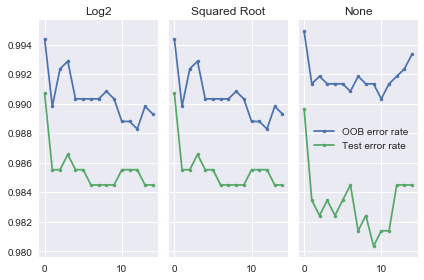

In [17]:
# Visualizamos
# 10 300 20
plt.figure(figsize=(12, 4));
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True);
axs[0].plot(tmp_oob_log2, '.-', label='OOB error rate');
axs[0].plot(tmp_test_acc_log, '.-', label='Test error rate');
axs[0].set_title('Log2');

axs[1].plot(tmp_oob_sqrt,'.-', label='OOB error rate');
axs[1].plot(tmp_test_acc_sqrt,'.-', label='Test error rate');
axs[1].set_title('Squared Root');

axs[2].plot(tmp_oob_none, '.-', label='OOB error rate');
axs[2].plot(tmp_test_acc_none,'.-', label='Test error rate');
axs[2].set_title('None');

plt.tight_layout();
plt.legend()